In [1]:
import json
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import re
from scipy.optimize import linear_sum_assignment
from scipy.spatial.distance import cdist
from gnn import visualize_graph
from graphgen import preprocess_climbs_data, load_json_data, create_color_mapping \
    , create_color_mapping, map_hold_types, organize_holds, perform_clustering_and_plot \
    , get_hand_sequence, create_graph_from_clustering, visualize_graph, create_mirrored_graph


In [2]:
kilter_xlim = 144
kilter_ylim = 156

In [3]:
df_climbs_angles = pd.read_csv('data/csvs/climbs_with_angles.csv', low_memory=False)
df_climbs = pd.read_csv('data/csvs/climbs.csv')
df_holes = pd.read_csv('data/csvs/holes.csv')
df_colors = pd.read_csv('data/csvs/placement_roles.csv')
df_vscale = pd.read_csv('data/csvs/vscale.csv')
df_climbs = preprocess_climbs_data(df_climbs, df_holes)
vid_lm, vid_lm_holds = load_json_data()
kilter_xlim = 144
kilter_ylim = 156
color_mapping = create_color_mapping(df_colors)
df_climbs = map_hold_types(df_climbs, color_mapping)
kilter_holds = organize_holds(df_climbs)
n_clusters_dict = {'Start': len(kilter_holds['Start']), 'Middle': len(kilter_holds['Middle']), 'Finish': len(kilter_holds['Finish'])}

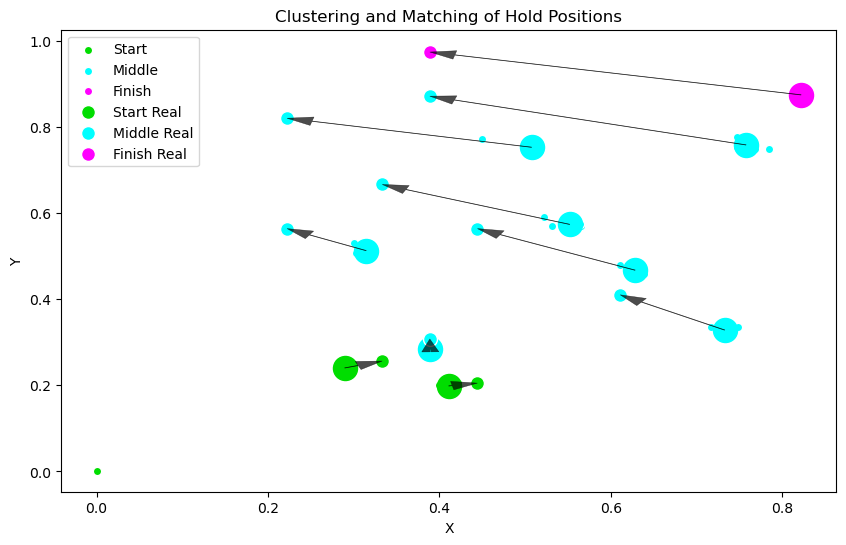

In [4]:
cluster_centers_dict, assignments = perform_clustering_and_plot(vid_lm_holds, n_clusters_dict, kilter_holds)

### Generating a Graph which connects hold based on moves 

In [5]:
print(f'There were a total of {len(vid_lm)} frames in the video.')
print("i.e. first frame data is: ", vid_lm[0])

There were a total of 695 frames in the video.
i.e. first frame data is:  [{'name': 'left_wrist', 'x': 0.3270527720451355, 'y': 0.7683948874473572, 'z': -0.11310763657093048, 'visibility': 0.9621812701225281}, {'name': 'right_wrist', 'x': 0.444804847240448, 'y': 0.7918567657470703, 'z': 0.18520863354206085, 'visibility': 0.9806087613105774}, {'name': 'left_ankle', 'x': 0.22515317797660828, 'y': 0.9855474829673767, 'z': 0.5517764687538147, 'visibility': 0.1796300709247589}, {'name': 'right_ankle', 'x': 0.3191329836845398, 'y': 0.9768409132957458, 'z': 0.6450603604316711, 'visibility': 0.09993615746498108}]


In [6]:
# lets see when the start holds are grabbed 
start_holds = cluster_centers_dict["Start"][:,:2]
print(f'relative coords of the Start holds: \n {start_holds}')

relative coords of the Start holds: 
 [[0.41095679 0.19857416]
 [0.28958333 0.2403495 ]]


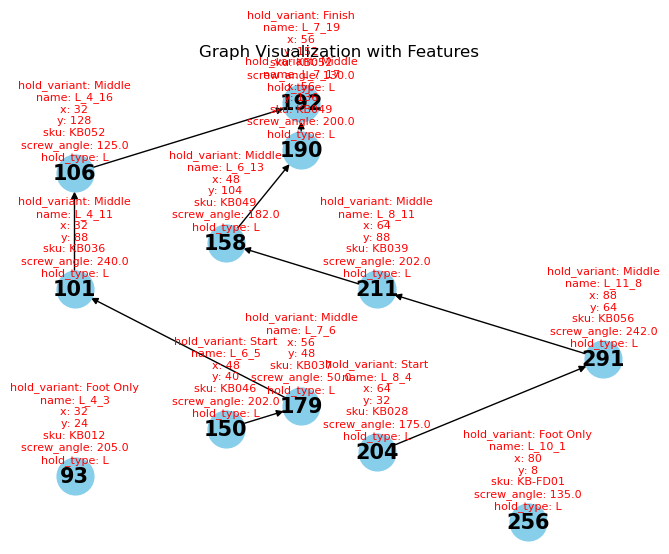

In [7]:
left_hand_sequence, right_hand_sequence = get_hand_sequence(cluster_centers_dict, vid_lm)
G, real_pos = create_graph_from_clustering(assignments, kilter_holds, right_hand_sequence, left_hand_sequence)
visualize_graph([G], 0)


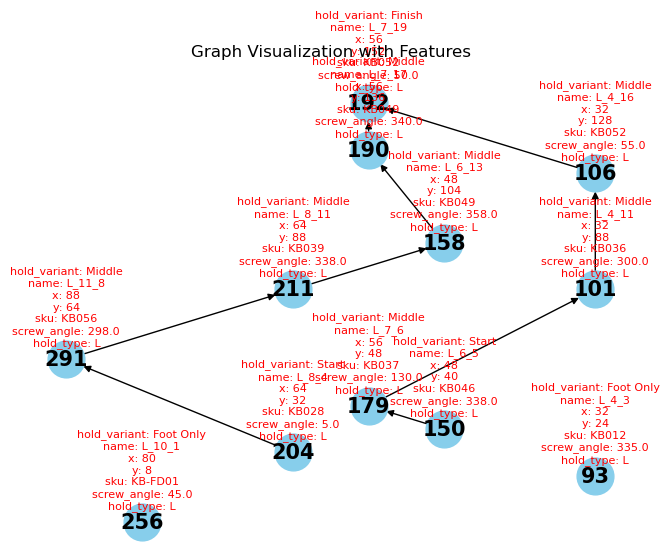

In [8]:
G_mirrored = create_mirrored_graph(G)
visualize_graph([G_mirrored], 0)

In [16]:
df_train = pd.read_csv('data/csvs/train.csv')
df_train.uuid

0       D0E5387D5B974D38B4E93FC4DFD61EF6
1       F01419E12672459396CA62E3655ABC46
2       A9FCD0BC271D402F8C4C80DE885B7BCA
3       bf0db71d0d674289beef46e226216bf6
4       18E34282FDF54D6BA0A3A7B57F0F2689
                      ...               
4116    d8239079830240c282ed5d229d1f764d
4117    e020c7c75bef402c959d5691031c29cc
4118    e0f83ff1eab84fa4994c910878d4779a
4119    e626293fe07e4c42b0c5dd11d228743a
4120    ef810a30339a4758bbe6d27f94f67d84
Name: uuid, Length: 4121, dtype: object

In [45]:
df = df_climbs_angles[["name", "uuid", "link_and_username"]].merge(df_train.set_index("uuid"), on="uuid", how="right").drop_duplicates().reset_index()

In [46]:
df

,index,name,uuid,link_and_username,coordinates,nodes,hold_type,difficulty
0,0,Floats Your Boat,D0E5387D5B974D38B4E93FC4DFD61EF6,"https://www.instagram.com/p/CM7HJ47nfCX/,rfrec...","[[56, 24], [64, 32], [32, 40], [64, 48], [32, ...","[176, 204, 95, 206, 97, 181, 236, 238, 129, 26...","['Foot Only', 'Foot Only', 'Foot Only', 'Foot ...",16.0000
1,15,swooped,F01419E12672459396CA62E3655ABC46,"https://www.instagram.com/p/CKv9QD4DHuc/,lokeo...","[[80, 8], [32, 24], [64, 32], [48, 40], [56, 4...","[256, 93, 204, 150, 179, 291, 101, 211, 158, 1...","['Foot Only', 'Foot Only', 'Start', 'Start', '...",22.0000
2,30,Lack of Faith,A9FCD0BC271D402F8C4C80DE885B7BCA,"https://www.instagram.com/p/CLcKru4jq1e/,_ronc...","[[32, 16], [48, 40], [48, 48], [96, 72], [48, ...","[92, 150, 151, 319, 155, 375, 267, 269, 297, 2...","['Foot Only', 'Start', 'Start', 'Foot Only', '...",20.0000
3,45,Sour Gummi Worms,bf0db71d0d674289beef46e226216bf6,"https://www.instagram.com/p/CM7K1ekno4H/,rfrec...","[[72, 8], [40, 40], [72, 40], [72, 48], [56, 6...","[229, 123, 233, 234, 181, 154, 292, 212, 240, ...","['Foot Only', 'Foot Only', 'Start', 'Foot Only...",14.9896
4,60,proj braj,18E34282FDF54D6BA0A3A7B57F0F2689,"https://www.instagram.com/p/CM71ltenxZ6/,rfrec...","[[32, 8], [56, 24], [40, 40], [48, 48], [96, 5...","[91, 176, 123, 151, 317, 181, 321, 186, 245]","['Foot Only', 'Foot Only', 'Start', 'Start', '...",23.0000
...,...,...,...,...,...,...,...,...
4116,22094,"wax on, wax off",d8239079830240c282ed5d229d1f764d,NaN,"[[16, 56], [48, 56], [24, 80], [48, 96], [16, ...","[42, 152, 73, 157, 48, 133, 79, 217, 136, 55, ...","['Start', 'Middle', 'Middle', 'Middle', 'Middl...",22.0000
4117,22095,... for nothing,e020c7c75bef402c959d5691031c29cc,"https://www.instagram.com/p/Cdd4oIXqylH/,bored...","[[8, 8], [8, 40], [40, 72], [24, 88], [56, 120...","[9, 13, 127, 74, 188, 271, 247, 168, 252, 336]","['Middle', 'Start', 'Middle', 'Middle', 'Middl...",21.0000
4118,22096,Space Module,e0f83ff1eab84fa4994c910878d4779a,NaN,"[[16, 16], [40, 40], [16, 56], [16, 80], [24, ...","[37, 123, 42, 45, 73, 49, 163, 247, 31, 255]","['Foot Only', 'Start', 'Start', 'Middle', 'Mid...",24.0000
4119,22097,Narc,e626293fe07e4c42b0c5dd11d228743a,"https://www.instagram.com/p/CmiScM-ripD/,morgy...","[[112, 56], [96, 64], [80, 96], [136, 96], [12...","[372, 318, 267, 460, 437, 468, 276, 444, 392, ...","['Start', 'Middle', 'Middle', 'Middle', 'Finis...",26.0000


In [55]:
id = 5
input_string = df.link_and_username[id]
df.name[id]

'HilDawgyDawg'

In [56]:
pattern = r'https://www\.instagram\.com/p/[\w-]+/'

# Find all matches in the input string
matches = re.findall(pattern, input_string)

# Print the list of valid Instagram links
for link in matches:
    print(link)

https://www.instagram.com/p/CM7P6UMH4mr/
https://www.instagram.com/p/CMLudsUFitM/
https://www.instagram.com/p/CO62UXdFW3M/
https://www.instagram.com/p/CPUluTtjLZe/
https://www.instagram.com/p/CPV7fNogoI3/
https://www.instagram.com/p/CQmpyCwFrOc/
https://www.instagram.com/p/CREpcY5HkIY/
https://www.instagram.com/p/CT1pbyGp63h/
https://www.instagram.com/p/CTOXoyMPngZ/
https://www.instagram.com/p/CUr31yZJK9u/
https://www.instagram.com/p/CVqYSe9DmGn/
https://www.instagram.com/p/CX0ESLJOWWu/
https://www.instagram.com/p/CZ-Pw4Zh0FD/
https://www.instagram.com/p/CZDsvwgpe11/
https://www.instagram.com/p/CZQ4z0Bje7v/
https://www.instagram.com/p/Ca_oECIgo1v/
https://www.instagram.com/p/CbMIwJ9A83P/
https://www.instagram.com/p/Cc3HgqYDCri/
https://www.instagram.com/p/Ce8qdmGFwSK/
https://www.instagram.com/p/CfuSMv2vP5N/
https://www.instagram.com/p/CgPDMFFp3ek/
https://www.instagram.com/p/CgTLnxdO6RW/
https://www.instagram.com/p/CjDZGzsJZGq/
https://www.instagram.com/p/CjpJUuNJp4v/
https://www.inst

In [60]:
df[["name", "link_and_username"]].to_csv("data/csvs/instagram_links.csv", index=False)